In [2]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# import data
import os

In [8]:
train_data = pd.read_csv(os.getcwd()+"/train.csv")

In [9]:
train_data.shape


(891, 12)

In [10]:
test_data = pd.read_csv(os.getcwd()+"/test.csv")

In [11]:
test_data.shape

(418, 11)

In [12]:
print(train_data.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [13]:
print(test_data.columns)

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [14]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
# there are missing values in AGE and Embarked columns. These are critical columns to predict the survival so can not be dropped. So lets impute data.

In [19]:
# Age outlier treatment. Lets impute missing age iwth mean age
missing_age = train_data.Age.mean()

In [20]:
print ('missing_age' , missing_age)

missing_age 29.69911764705882


In [21]:
train_data.Age.fillna(missing_age, inplace=True)

In [22]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [31]:
#Embarked has just 2 missing values so lets impute with most recurrign value
train_data.Embarked.fillna(train_data.Embarked.value_counts().idxmax(),inplace=True)


In [32]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [33]:
# cabin has too many missing values so imputing this will effect model negatively. So lets drop it.
train_data = train_data.drop(['Cabin'], axis=1)

In [36]:
train_data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [38]:
#now the dataset is ready for model creation. Repeat same data cleanign effort for test data

In [39]:
test_data.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [40]:
test_data.Age.fillna(test_data.Age.mean(),inplace=True)

In [41]:
test_data.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [43]:
test_data.drop(['Cabin'],axis=1, inplace=True)

In [44]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [45]:
test_data.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [51]:
test_data.dropna(inplace=True)

In [52]:
test_data.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [54]:
test_data.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
413,1305,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,S
417,1309,3,"Peter, Master. Michael J",male,30.27259,1,1,2668,22.3583,C


In [55]:
#Convert Categorical variable data into numerical ones

In [56]:
training_df = pd.get_dummies(train_data, columns=['Sex','Embarked','Pclass'])

In [58]:
train_data.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [59]:
training_df.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,1,0,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1,0,1,0,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1,0,0,0,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,1,0,0,0,1,1,0,0
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,1,0,0,1,0,0,1


In [61]:
#since there are only 2 variants in SEX we cand drop either sex_male or sex_female column. 
training_df.drop(columns=['Sex_female'],inplace=True)


In [62]:
training_df.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1,0,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,1,0,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0,0,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,0,0,1,1,0,0
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,0,0,1,0,0,1


In [63]:
#repeat this data transformation for test data
testing_df = pd.get_dummies(test_data, columns=['Sex','Embarked','Pclass'])

In [65]:
test_data.Sex.value_counts()

male      265
female    152
Name: Sex, dtype: int64

In [66]:
#since there are only 2 variants in SEX we cand drop either sex_male or sex_female column. 
testing_df.drop(columns=['Sex_female'],inplace=True)

In [67]:
testing_df.head()

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,892,"Kelly, Mr. James",34.5,0,0,330911,7.8292,1,0,1,0,0,0,1
1,893,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,0,0,0,1,0,0,1
2,894,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,1,0,1,0,0,1,0
3,895,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,1,0,0,1,0,0,1
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,0,0,0,1,0,0,1


# Feature Selection

In [68]:
# Name and PassengerId do not effect survival rate. So lets drop them from data set
training_df.drop(columns=['Name','PassengerId'],inplace=True)
testing_df.drop(columns=['Name','PassengerId'],inplace=True)

In [70]:
#SibSp and Parchment together is telling if the person is travelling alone or not
training_df['Alone'] = np.where(training_df.SibSp + training_df.Parch > 0, 0, 1)
testing_df['Alone'] = np.where(testing_df.SibSp + testing_df.Parch > 0, 0, 1)

In [102]:
# Name and PassengerId do not effect survival rate. So lets drop them from data set
training_df.drop(columns=['Ticket'],inplace=True)
testing_df.drop(columns=['Ticket'],inplace=True)

In [103]:
training_df.head()

,Survived,Age,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Alone
0,0,22.0,7.2500,1,0,0,1,0,0,1,0
1,1,38.0,71.2833,0,1,0,0,1,0,0,0
2,1,26.0,7.9250,0,0,0,1,0,0,1,1
3,1,35.0,53.1000,0,0,0,1,1,0,0,0
4,0,35.0,8.0500,1,0,0,1,0,0,1,1


In [104]:
testing_df.head()

,Age,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Alone
0,34.5,7.8292,1,0,1,0,0,0,1,1
1,47.0,7.0000,0,0,0,1,0,0,1,0
2,62.0,9.6875,1,0,1,0,0,1,0,1
3,27.0,8.6625,1,0,0,1,0,0,1,1
4,22.0,12.2875,0,0,0,1,0,0,1,0


In [ ]:
# now lets drop Sibsp and Parch columsns
training_df.drop(columns=['SibSp','Parch'],inplace=True)
testing_df.drop(columns=['SibSp','Parch'],inplace=True)

In [74]:
training_df.head()

,Survived,Age,Ticket,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Alone
0,0,22.0,A/5 21171,7.2500,1,0,0,1,0,0,1,0
1,1,38.0,PC 17599,71.2833,0,1,0,0,1,0,0,0
2,1,26.0,STON/O2. 3101282,7.9250,0,0,0,1,0,0,1,1
3,1,35.0,113803,53.1000,0,0,0,1,1,0,0,0
4,0,35.0,373450,8.0500,1,0,0,1,0,0,1,1


In [75]:
testing_df.head()

,Age,Ticket,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Alone
0,34.5,330911,7.8292,1,0,1,0,0,0,1,1
1,47.0,363272,7.0000,0,0,0,1,0,0,1,0
2,62.0,240276,9.6875,1,0,1,0,0,1,0,1
3,27.0,315154,8.6625,1,0,0,1,0,0,1,1
4,22.0,3101298,12.2875,0,0,0,1,0,0,1,0


In [106]:
# final check for missing values
training_df.isna().sum()

Survived      0
Age           0
Fare          0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
Pclass_1      0
Pclass_2      0
Pclass_3      0
Alone         0
dtype: int64

In [107]:
testing_df.isna().sum()

Age           0
Fare          0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
Pclass_1      0
Pclass_2      0
Pclass_3      0
Alone         0
dtype: int64

# Model

In [78]:
# Split train and test datas
# import sklearn libs
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [112]:
X_train, X_test, y_train, y_test = train_test_split(training_df.drop('Survived', axis=1), training_df['Survived'], test_size=0.3)

In [113]:
X_train.shape,X_test.shape, y_train.shape, y_test.shape

((623, 10), (268, 10), (623,), (268,))

In [114]:
X_train.head(10)

,Age,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Alone
688,18.000000,7.7958,1,0,0,1,0,0,1,1
419,10.000000,24.1500,0,0,0,1,0,0,1,0
775,18.000000,7.7500,1,0,0,1,0,0,1,1
763,36.000000,120.0000,0,0,0,1,1,0,0,0
126,29.699118,7.7500,1,0,1,0,0,0,1,1
486,35.000000,90.0000,0,0,0,1,1,0,0,0
488,30.000000,8.0500,1,0,0,1,0,0,1,1
164,1.000000,39.6875,1,0,0,1,0,0,1,0
357,38.000000,13.0000,0,0,0,1,0,1,0,1
785,25.000000,7.2500,1,0,0,1,0,0,1,1


In [115]:
logReg = LogisticRegression() #initialize

In [ ]:
# Fit the model
logReg.fit(X_train, y_train)

In [ ]:
#score the model 
logReg.fit(X_train, y_train).score(X_train, y_train)

In [118]:
# predict the data from model
y_pred = logReg.predict(X_test)

# visualize results

In [123]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [121]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       174
           1       0.73      0.69      0.71        94

    accuracy                           0.80       268
   macro avg       0.78      0.78      0.78       268
weighted avg       0.80      0.80      0.80       268



In [122]:
confusion_matrix(y_test, y_pred)

array([[150,  24],
       [ 29,  65]], dtype=int64)

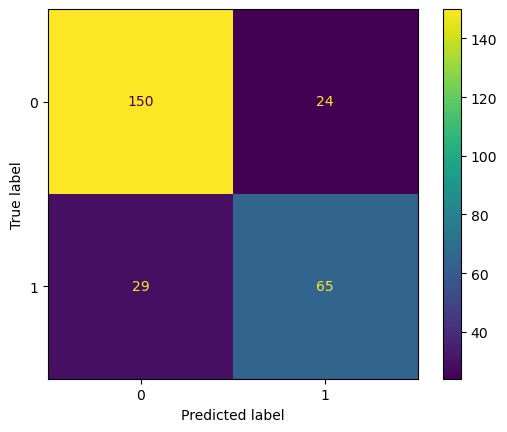

In [124]:
# compare results
ConfusionMatrixDisplay.from_estimator(logReg, X_test, y_test)

In [126]:
from sklearn import metrics

In [130]:
print("Accuracy", metrics.accuracy_score(y_test, y_pred))
print("Precision score", metrics.precision_score(y_test, y_pred))

Accuracy 0.8022388059701493
Precision score 0.7303370786516854


# On testData

In [131]:
pred_results = logReg.predict(testing_df)

In [134]:
testing_df

,Age,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Alone
0,34.50000,7.8292,1,0,1,0,0,0,1,1
1,47.00000,7.0000,0,0,0,1,0,0,1,0
2,62.00000,9.6875,1,0,1,0,0,1,0,1
3,27.00000,8.6625,1,0,0,1,0,0,1,1
4,22.00000,12.2875,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
413,30.27259,8.0500,1,0,0,1,0,0,1,1
414,39.00000,108.9000,0,1,0,0,1,0,0,1
415,38.50000,7.2500,1,0,0,1,0,0,1,1
416,30.27259,8.0500,1,0,0,1,0,0,1,1


In [137]:
test_data.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [153]:

final_preds = pd.DataFrame(pred_results)
final_preds.rename(columns={0:'Survived'}, inplace=True)


In [155]:
final_preds.value_counts()

PassengerId  Survived
892.0        0.0         1
893.0        0.0         1
1177.0       0.0         1
1176.0       0.0         1
1175.0       1.0         1
                        ..
1027.0       0.0         1
1026.0       0.0         1
1025.0       0.0         1
1024.0       0.0         1
1308.0       0.0         1
Length: 416, dtype: int64

In [154]:
final_preds = pd.concat([test_data['PassengerId'], final_preds], axis=1)

In [157]:
final_preds.Survived.value_counts()

0.0    260
1.0    157
Name: Survived, dtype: int64

In [158]:
final_preds.to_csv('mytitanic_predictions.csv', index=False)